***

<p style="text-align: center; font-size: 24px; font-weight: bold;">PPO algorithm applied to the Snake game</p>

***

➤ Libraries and modules importation

In [1]:
from Game import SnakeEnv # Our snake game environment
from Agent import PPOAgent
import pygame
import time

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


➤ Environment creation. You can play the game by calling the .play_human() method and verify the observation space and rewards while playing. (Use the arrow keys to move the snake and "esc" to quit the game)

The observation is a vector of 14 elements : 
- Head position (2)
- Food position (2)
- Current direction (2)
- Snake vision in 8 directions (8)

In [2]:
env = SnakeEnv(width=640, height=480, grid_size=20, render_mode='human')
env.play_human()
env.change_render_mode('None') # For training, we don't need to render the game

➤ Instantiation of our PPO agent. Parameters are:

- **gamma**: Discount factor, determines the importance of future rewards.
- **gae_lambda**: Generalized Advantage Estimation lambda, balances bias and variance in advantage estimation.
- **clip_epsilon**: Clipping parameter, limits the change in policy updates.
- **entropy_coef**: Entropy coefficient, encourages exploration by adding entropy to the loss function.
- **policy_lr**: Policy learning rate, controls the step size for policy updates.
- **critic_lr**: Critic learning rate, controls the step size for critic updates.
- **eval_interval**: Evaluation interval, frequency of agent evaluation during training.
- **save_interval**: Saving interval, frequency of saving the model during training.

In [3]:
args = {
    'gamma': 0.99,
    'gae_lambda': 0.95,
    'clip_epsilon': 0.2,
    'entropy_coef': 0.01,
    'policy_lr': 3e-4,
    'critic_lr': 1e-3,
    'eval_interval': 10,
    'save_interval': 50
}
agent = PPOAgent(env, args)

➤ Now you can either train the agent or load a pre-trained model.

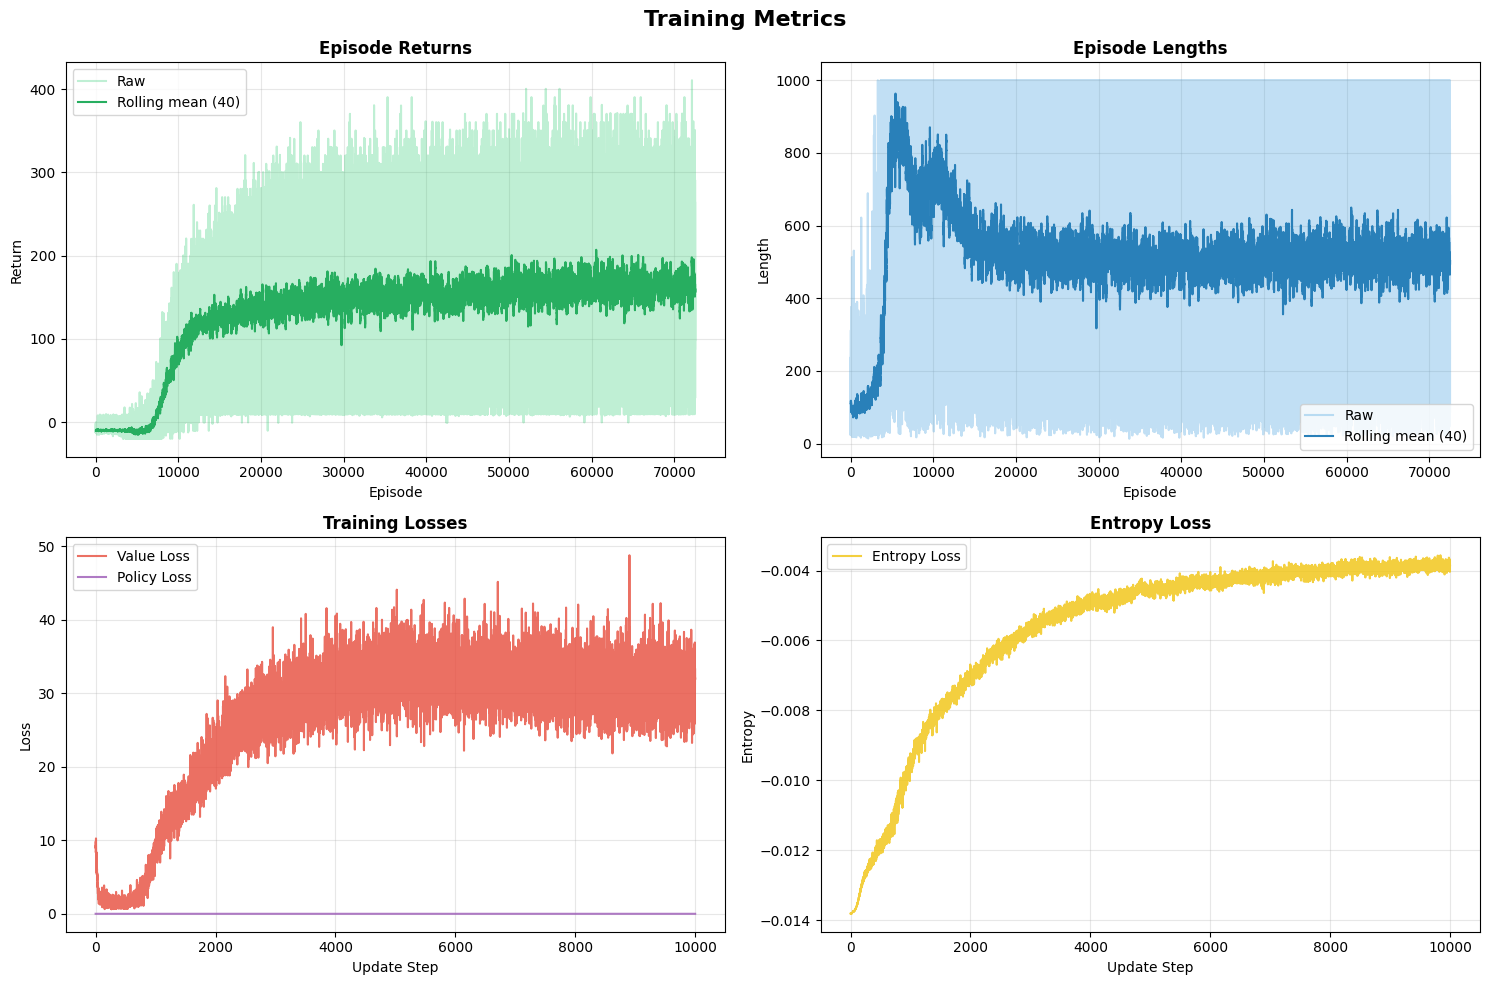

In [4]:
# ------------------- Train the agent -------------------
# agent.train(total_epochs=10000, steps_per_epoch=4096)
# from utils import plot_metrics
# plot_metrics(agent.metrics)
# agent.save('ppo_epoch_10000') # Save the model

# ---------------- Load a trained model ----------------
agent.load('models/ppo_epoch_10000')

➤ Finally, you can play the game with the trained agent by calling the `.test_episode()` method. It will open a visualization of the game and return the total reward obtained during the episode as well as the length of the episode (maximum length is 1000, if the snake doesn't die before).

In [33]:
agent.test_episode()

(300.6900000000039, 964)